## importing necessary modules

here we will import necessary modules for this task

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

import nltk

from wordcloud import WordCloud

# for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# for encoding
from sklearn.preprocessing import LabelEncoder

# for splitting the dataset
from sklearn.model_selection import train_test_split

# for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# for model evaluation
from sklearn.metrics import classification_report

# for performance
from sklearn.multiclass import OneVsRestClassifier

# for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

## loading the dataset

in this section we will load the dataset obtained from 'Kaggle'

datasource - https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset 

In [193]:
data = pd.read_csv('/kaggle/input/resume-dataset/Resume/Resume.csv')

In [194]:
data.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [195]:
# checking if there is any null values in the dataset
data.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [197]:
# removing the Resume_html and ID column as we don't need them

df = data.drop(['ID', 'Resume_html'], axis=1)
df.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


## Data Preprocessing

This section contains the data preprocessing part. Data is preprocessed to make the data suitable for the model to fit on.

In [168]:
# making a list of nltk stopwords
stopWords = nltk.corpus.stopwords.words('english')
len(stopWords)

179

In [169]:
# cleaning unnecessary characters

def cleaner(text):
    # converting the whole string to lower case
    txt = text.lower()
    
    # removing non-english characters, punctucations and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    
    # removing extra spaces from the text
    txt = re.sub('\s+', ' ', txt)
    
    # tokenizing the string
    txt = nltk.tokenize.word_tokenize(txt)
    
    # removing stop words
    txt = [w for w in txt if not w in stopWords]
    
    return ' '.join(txt)

In [170]:
# cleaning the strings in the dataset
df['Resume'] = df['Resume_str'].apply(lambda w: cleaner(w))

In [171]:
df.pop('Resume_str')
df.head()

,Category,Resume
0,HR,hr administrator marketing associate hr admini...
1,HR,hr specialist us hr operations summary versati...
2,HR,hr director summary years experience recruitin...
3,HR,hr specialist summary dedicated driven dynamic...
4,HR,hr manager skill highlights hr skills hr depar...


## Exploratory Data Analysis (EDA)

In [173]:
# listing the unique categories in the dataset
categories = df['Category'].unique()
# sorting them alphabetically
categories = np.sort(categories)
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [174]:
# counting the values in each category
category_counts = df['Category'].value_counts()
category_counts

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

<Axes: >

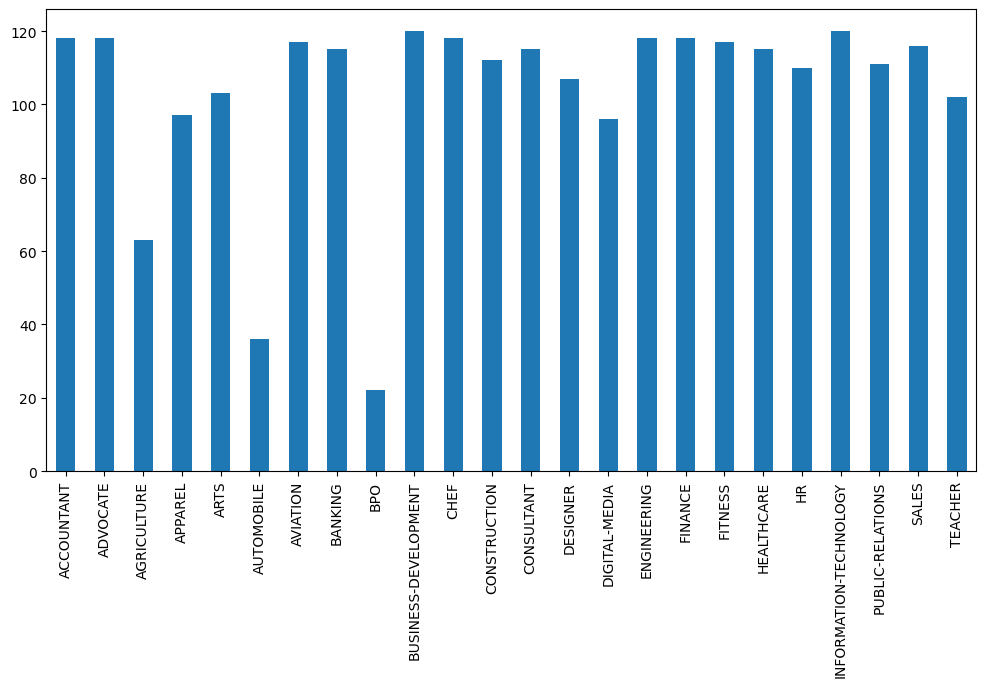

In [175]:
# visualizing the number of categories sorted by categories alphabetically
category_counts.sort_index().plot(kind='bar', figsize=(12,6))

<Axes: >

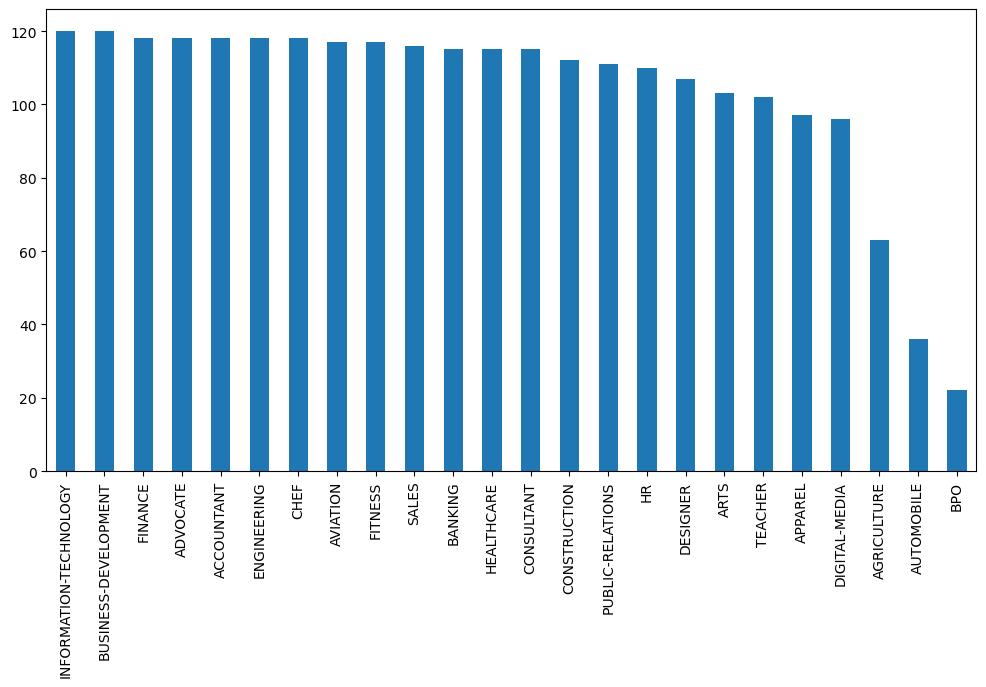

In [176]:
# visualizing the number of categories sorted by the counted values in descending order
category_counts.plot(kind='bar', figsize=(12,6))

In [177]:
# creating a class for analyzing words
class word_analyzer():
    import nltk
    
    def __init__(self, data):
        words = [] # for listing words in a record seperately
        all_words = [] # for listing all words together
        records = data.values
        for record in records:
            w = record.split()
            words.append(w)
            all_words += w
            
        self.words = words
        self.all_words = all_words
        self.unique_words =  set(all_words)
    
    def most_frequent(self, n):
        word_freq = nltk.FreqDist(self.all_words)
        most_frequent_words = word_freq.most_common(n)
        return(most_frequent_words)

In [178]:
#  creating a word_analysis object
word_analysis = word_analyzer(df['Resume'])

In [179]:
# finding 50 most frequent words in the dataset
most_frequent = word_analysis.most_frequent(20)
most_frequent

[('state', 16159),
 ('company', 15212),
 ('city', 15077),
 ('management', 12174),
 ('name', 11739),
 ('sales', 8275),
 ('customer', 7927),
 ('business', 7866),
 ('skills', 7729),
 ('new', 6409),
 ('service', 6223),
 ('team', 6073),
 ('development', 5731),
 ('training', 5637),
 ('experience', 5632),
 ('project', 5362),
 ('work', 4817),
 ('manager', 4534),
 ('information', 4502),
 ('marketing', 4489)]

so 'state', 'company' and 'city' are the top three most frequent words in the dataset

In [180]:
# finding the number of unique words
unique_words = word_analysis.unique_words
print(len(unique_words))

37603


the dataset has 37603 unique words

let's find the most frequent words by category

In [19]:
# most frequent words by categories
all_words_of = {} #dictionary of all words by category
most_frequent_of = {}
for i, category in enumerate(categories):
    category_analysis = word_analyzer(df[df['Category'] == category]['Resume'])
    most_frequent_ = category_analysis.most_frequent(20)
    most_frequent_of.update({category: most_frequent_})
    words_by_category = category_analysis.all_words
    words_joined = ' '.join(words_by_category)
    all_words_of.update({category: words_joined})
    print('Most frequent words in category: ', category)
    print('-'*50)
    print(most_frequent_)
    print('\n')

Most frequent words in category:  ACCOUNTANT
--------------------------------------------------
[('accounting', 1225), ('financial', 1081), ('accounts', 797), ('state', 787), ('company', 776), ('city', 680), ('management', 584), ('name', 546), ('accountant', 532), ('reports', 477), ('tax', 434), ('monthly', 432), ('general', 384), ('business', 373), ('skills', 362), ('payroll', 356), ('analysis', 354), ('cash', 332), ('reporting', 328), ('account', 320)]


Most frequent words in category:  ADVOCATE
--------------------------------------------------
[('state', 922), ('city', 832), ('customer', 741), ('company', 730), ('name', 620), ('service', 541), ('skills', 512), ('management', 479), ('sales', 339), ('care', 297), ('team', 297), ('training', 287), ('information', 273), ('experience', 272), ('staff', 265), ('customers', 265), ('new', 262), ('advocate', 261), ('services', 261), ('clients', 260)]


Most frequent words in category:  AGRICULTURE
-------------------------------------------

### barplot visualization of most frequent words

in this section we will visualize the data in bar plots, so that we can easily understand the most frequent words

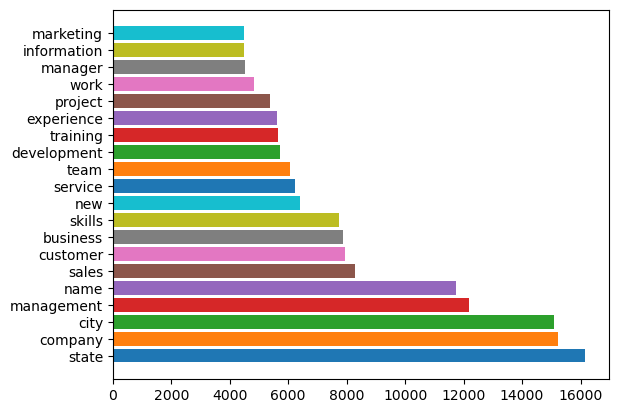

In [43]:
# showing top 20 of the most frequent words in the whole dataset
for i in range(20):
    plt.barh(most_frequent[i][0], most_frequent[i][1])

plt.show()
plt.close()

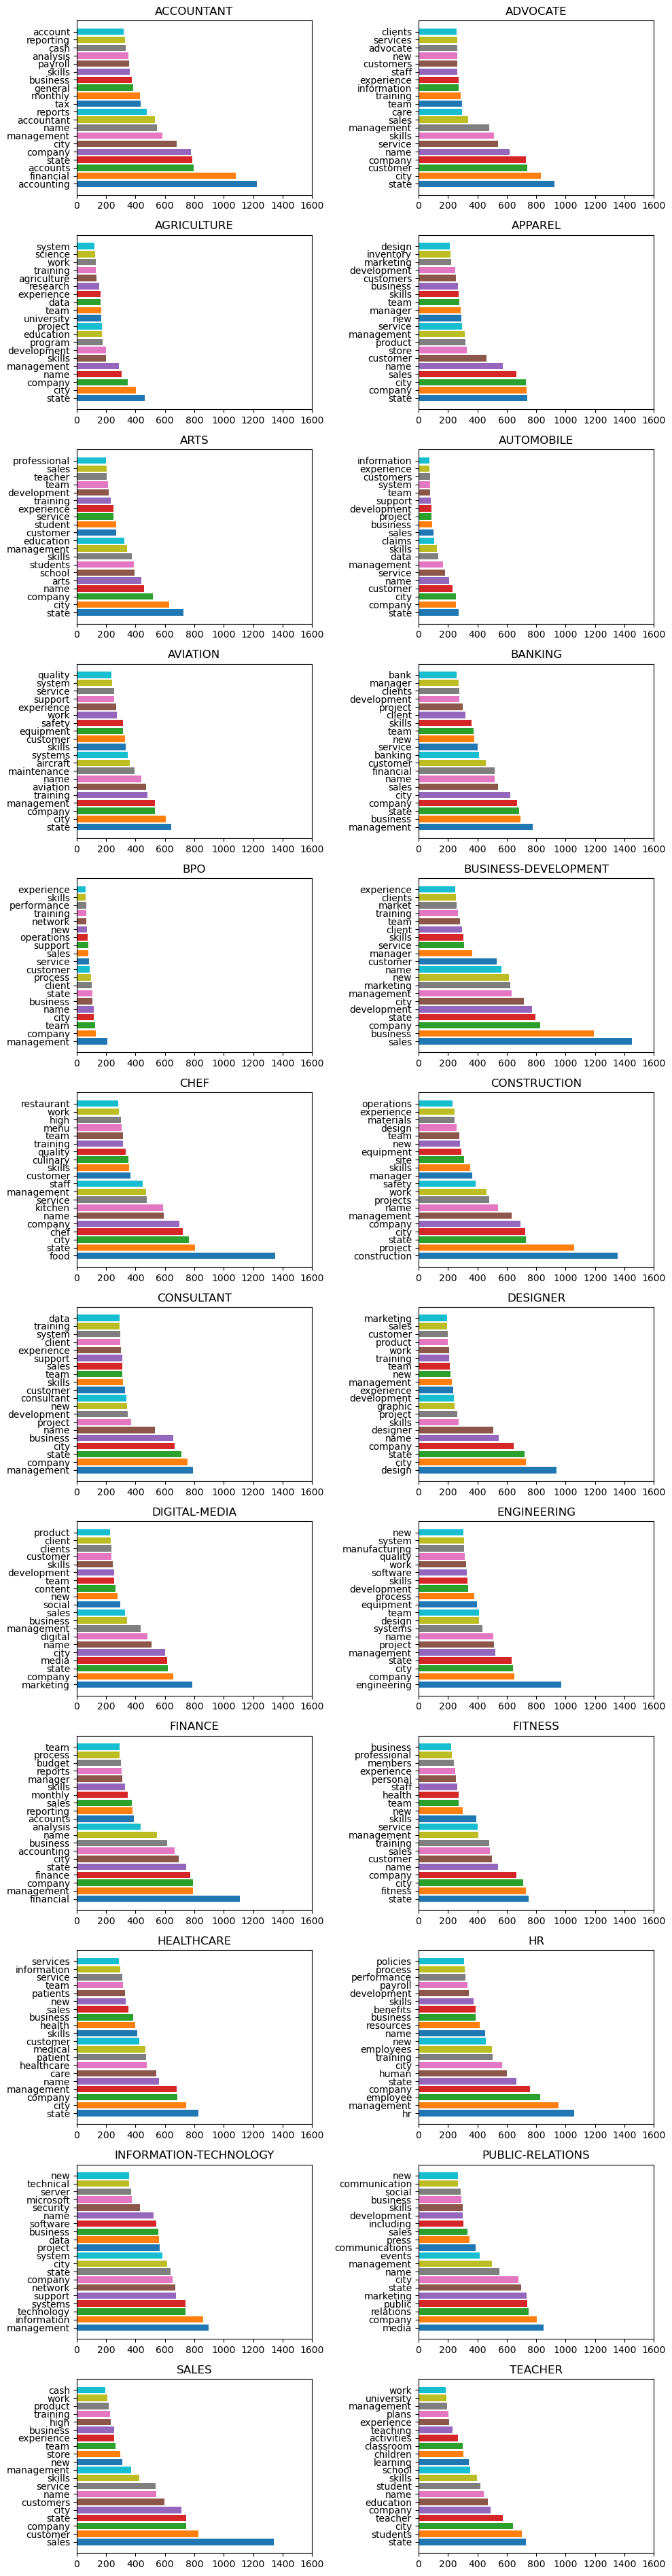

In [25]:
# showing 20 most frequent words of all category

fig = plt.figure(figsize=(10,38))
for i, category in enumerate(categories):
    fig.add_subplot(12, 2, i+1).set_title(category)
    for j in range(20):
        plt.barh(most_frequent_of[category][j][0], most_frequent_of[category][j][1])
#     plt.title(category)
    plt.xlim(0,1600)
plt.tight_layout()
plt.show()
plt.close()

### Word Cloud visualization

In [49]:
# function for generating wordcloud
def wordcloud(text):
    wordcloud = WordCloud().generate(text)
    return wordcloud

In [47]:
# joining all words for generating word cloud
all_words_joined = ' '.join(word_analysis.all_words)

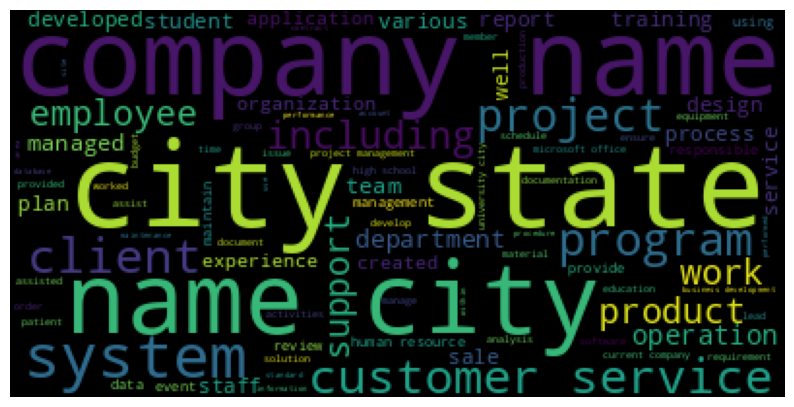

In [50]:
# plotting wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud(all_words_joined))
plt.axis("off")
plt.show()

most frequent words are shown bigger and bolder in the wordcloud, this word cloud clearly reflects our most frequent words list

let's visualize the word cloud based on categories

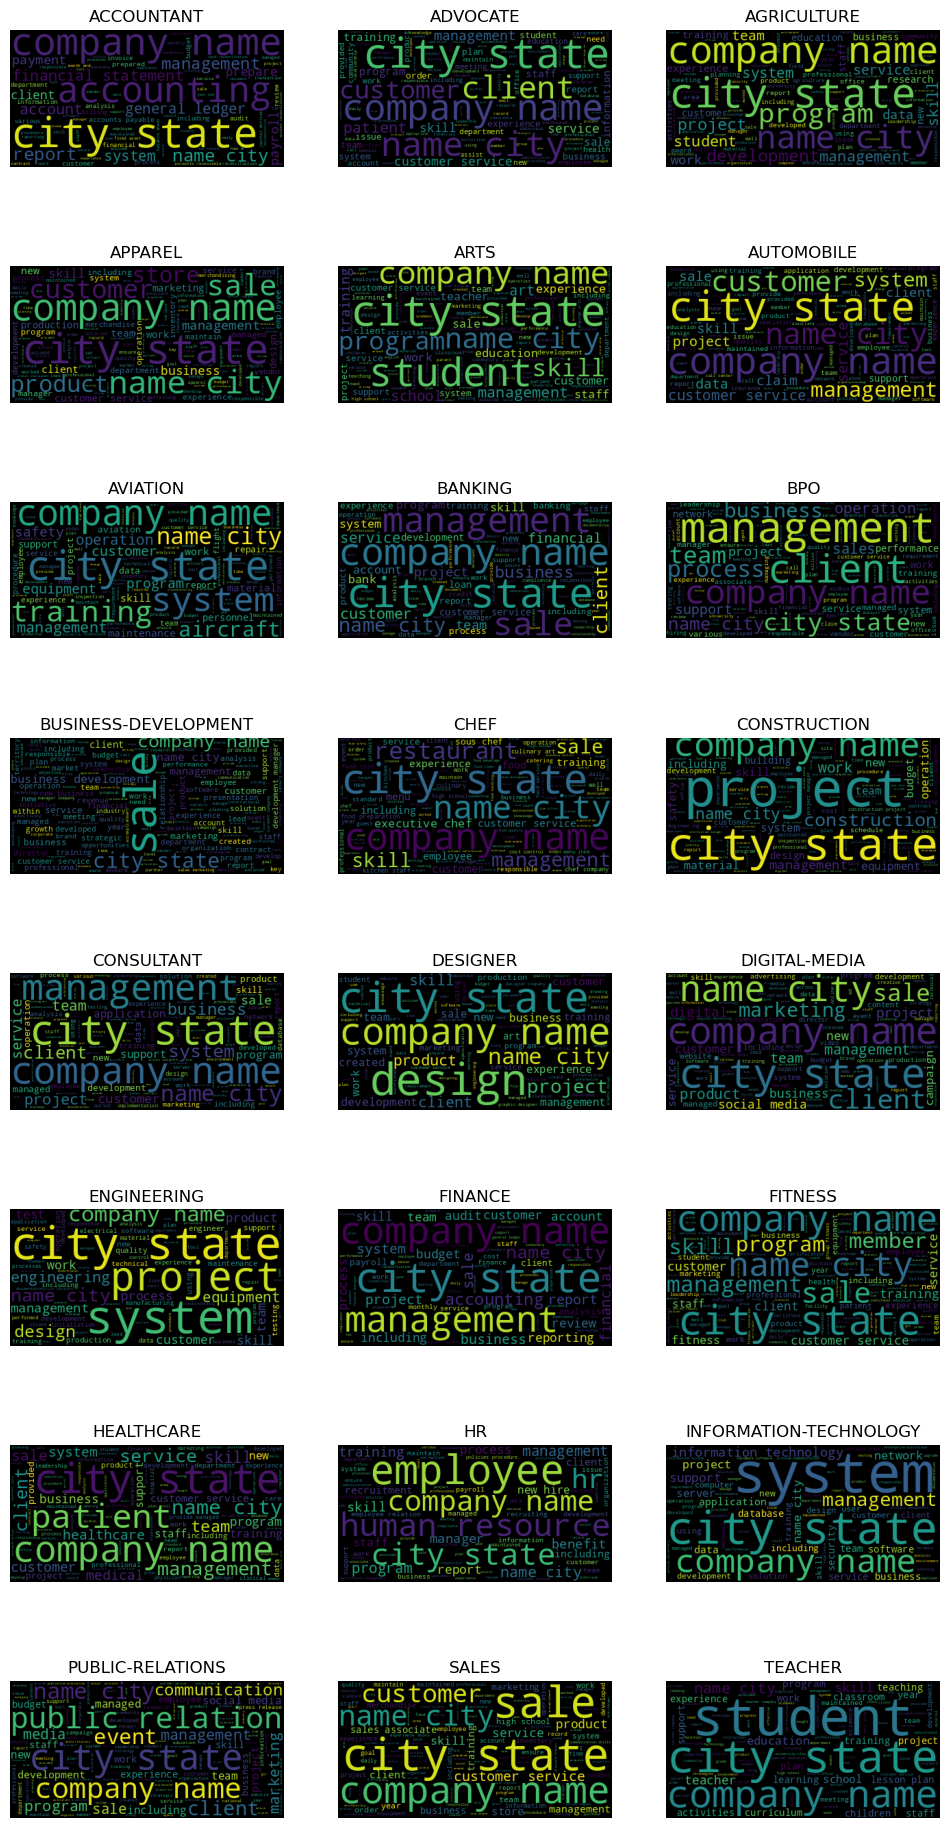

In [62]:
# visualizing most frequent words by categories
plt.figure(figsize=(12,24))

for i, category in enumerate(categories):
    wordcloud_category = wordcloud(all_words_of[category])
    
    plt.subplot(8, 3, i+1).set_title(category)
    plt.imshow(wordcloud_category)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

<b> from the words frequency by category, their barplot and wordcloud we can clearly see that there are some common words that are present in all the categories. If we fit this data as it is now our models performance will be hampered. we will deal with this in the next section </b> 

## Model Selection and Training

scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

    tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

    counting the occurrences of tokens in each document.

    normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.

In this scheme, features and samples are defined as follows:

    each individual token occurrence frequency (normalized or not) is treated as a feature.

    the vector of all the token frequencies for a given document is considered a multivariate sample.
    
reference: sklearn documentation

let's split the data

In [186]:
X_train_nv, X_test_nv, y_train, y_test = train_test_split(df['Resume'], df['Category'],
                                                    random_state=0, test_size=0.2,
                                                    shuffle=True, 
                                                    stratify=df['Category'])

In [187]:
print(X_train_nv.shape)
print(X_test_nv.shape)

(1987,)
(497,)


let's make a word_vectorizer object using the TfidfVectorizer

In [206]:
# we will use TfidfVectorizer for feature extraction
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')

we will vectorize our words with the word_vectorizer object we created earlier. it will also weight the words according to their importance. this will also make the data suitable for fitting into a model

In [207]:
# vectorize the words
word_vectorizer.fit(X_train_nv)

X_train = word_vectorizer.transform(X_train_nv)
X_test = word_vectorizer.transform(X_test_nv)

#### model validation
here we will validate some models to see how they perform on the trainig data

In [26]:
# importing models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier

now we will make a function for validating the models,
so we will use stratified k-fold cross validation method because :
1. the data is a imbalanced
2. this will ensure that all the folds contains similiar ratio of classes

In [27]:
skf = StratifiedKFold(n_splits=3)

let's fit some model.

In [28]:
svc = SVC(random_state=0)
rf = RandomForestClassifier(random_state=0)
mnnb = MultinomialNB()
lsvc = LinearSVC(random_state=0)
sgd = SGDClassifier(random_state=0)
pac = PassiveAggressiveClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)

In [61]:
scores = cross_val_score(svc, X_train, y_train, cv=skf)
print(scores) 

[0.57013575 0.55287009 0.59969789]


In [101]:
scores = cross_val_score(rf, X_train, y_train, cv=skf)
print(scores) 

[0.62594268 0.60725076 0.60725076]


In [98]:
scores = cross_val_score(mnnb, X_train, y_train, cv=skf)
print(scores) 

[0.4841629  0.48338369 0.5060423 ]


In [46]:
scores = cross_val_score(lsvc, X_train, y_train, cv=skf)
print(scores) 

[0.64705882 0.6570997  0.66767372]


In [45]:
scores = cross_val_score(sgd, X_train, y_train, cv=skf)
print(scores) 

[0.65761689 0.63293051 0.64803625]


In [208]:
scores = cross_val_score(pac, X_train, y_train, cv=skf)
print(scores) 

[0.6546003  0.64803625 0.66465257]


In [27]:
scores = cross_val_score(gbc, X_train, y_train, cv=skf)
print(scores) 

[0.68778281 0.70845921 0.68277946]


initially we will choose 'pac' and 'lsvc'
because they yield:
1. higer accuracy
2. higher stability
3. speed

though 'gbc' achieved highest accuracy among our tested models, we didn't choosed it because it is very slow

#### model evaluation

In [67]:
# function for model evaluation
def evaluate_model(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model)
    print('-'*50)
    print(classification_report(y_test, pred))

### hyperparameter tuning

in this section we will tune the parameters of the model to increase its performance and stability.
we will use GridSearchCV for this purpose.

In [44]:
from sklearn.model_selection import GridSearchCV

In [68]:
# for passive aggressive classifier
param_grid = {
    'max_iter': [20, 25, 30],
    'loss': ['hinge', 'squared_hinge'],
    'n_jobs': [ -1, None]
}

In [69]:
grid_search = GridSearchCV(pac, param_grid=param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


PassiveAggressiveClassifier(loss='squared_hinge', max_iter=20, n_jobs=-1,
                            random_state=0)
0.6648215890535802


In [70]:
# let's check the performance of parameter tuned model
pac_hp = PassiveAggressiveClassifier(loss='squared_hinge', max_iter=20,
                                     random_state=0, n_jobs=-1)

scores = cross_val_score(pac_hp, X_train, y_train, cv=skf)
print(scores)

[0.6561086  0.6510574  0.66163142]


In [71]:
# let's evaluate the models performance on the test data
evaluate_model(pac_hp)

PassiveAggressiveClassifier(loss='squared_hinge', max_iter=20, n_jobs=-1,
                            random_state=0)
--------------------------------------------------
                        precision    recall  f1-score   support

            ACCOUNTANT       0.80      0.83      0.82        24
              ADVOCATE       0.62      0.75      0.68        24
           AGRICULTURE       0.83      0.38      0.53        13
               APPAREL       0.58      0.37      0.45        19
                  ARTS       0.56      0.24      0.33        21
            AUTOMOBILE       0.00      0.00      0.00         7
              AVIATION       0.78      0.75      0.77        24
               BANKING       0.63      0.83      0.72        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.61      0.46      0.52        24
                  CHEF       0.95      0.75      0.84        24
          CONSTRUCTION       0.83      0.91      0.87        2

In [60]:
# for lsvc
param_grid = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'multi_class': ['ovr', 'crammer_singer'],
    'max_iter': [500, 800, 1000]
}

In [61]:
gscv = GridSearchCV(LinearSVC(random_state=0),
                           param_grid=param_grid, n_jobs=-1, cv=skf)
gscv.fit(X_train, y_train)
print(gscv.best_estimator_)
print(gscv.best_score_)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC(loss='hinge', max_iter=500, multi_class='crammer_singer',
          penalty='l1', random_state=0)
0.6663316582914574


In [65]:
lsvc_hp =LinearSVC(loss='hinge', max_iter=500, multi_class='crammer_singer',
                   penalty='l1', random_state=0)

scores = cross_val_score(lsvc_hp, X_train, y_train, cv=skf)
print(scores)

[0.66063348 0.6570997  0.66767372]


In [63]:
# let's evaluate the models performance on the test data
lsvc_hp = LinearSVC(loss='hinge', max_iter=500, multi_class='crammer_singer', penalty='l1',
          random_state=0)
evaluate_model(lsvc_hp)

LinearSVC(loss='hinge', max_iter=500, multi_class='crammer_singer',
          penalty='l1', random_state=0)
--------------------------------------------------
Training Score:  0.9994967287367891
--------------------------------------------------
                        precision    recall  f1-score   support

            ACCOUNTANT       0.81      0.92      0.86        24
              ADVOCATE       0.69      0.75      0.72        24
           AGRICULTURE       0.83      0.38      0.53        13
               APPAREL       0.64      0.37      0.47        19
                  ARTS       0.50      0.14      0.22        21
            AUTOMOBILE       1.00      0.14      0.25         7
              AVIATION       0.79      0.79      0.79        24
               BANKING       0.62      0.78      0.69        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.67      0.50      0.57        24
                  CHEF       0.90      0.79      

LinearSVC performs slightly better than the PassiveAggressiveClassifier. So we will build our final model using LinearSVC

## Pipelining

in this section we will create necessary functions and save the model so that we can run it by a python script from command line

In [87]:
# saving the trained model
trained_model = lsvc_hp.fit(X_train, y_train)

In [136]:
# importing necessary modules for piplining
from sklearn.pipeline import Pipeline

In [209]:
# creating pipeline for our model
model = Pipeline([
    ('transformer', word_vectorizer),
    ('classifier', trained_model)
])

In [149]:
# showing our pipeline diagram

from sklearn import set_config

set_config(display='diagram')
display(model)

Pipeline(steps=[('transformer',
                 TfidfVectorizer(stop_words='english', sublinear_tf=True)),
                ('classifier',
                 LinearSVC(loss='hinge', max_iter=500,
                           multi_class='crammer_singer', penalty='l1',
                           random_state=0))])

In [210]:
# dumping/saving the model pipline for the script
model_name = 'model.joblib'
joblib.dump(model, model_name)

['model.joblib']